In [42]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import sqrt, sin
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt, random
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from copy import copy
%matplotlib inline

# Ex 1
Exploring imshow..

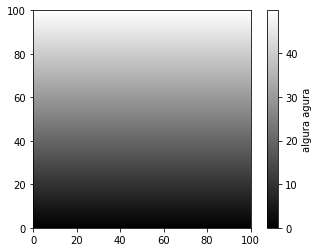

In [43]:
from math import sqrt, sin, pi 
from numpy import empty 
from pylab import imshow, gray, show, colorbar

side = 100
points = 500
spacing = side/points
xi = empty([points, points], float)

for i in range(points):
    y = spacing*i
    for j in range(points):
        x = spacing*j
        xi[i, j] = 0.1*i


plot = imshow(xi, origin="lower", extent=[0, side, 0, side])
cb = colorbar(plot)
cb.set_label("algura agura")
gray()
show()

C:\Users\migue\AppData\Local\Temp\ipykernel_13208\154560698.py:27: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  cb = colorbar(plot)


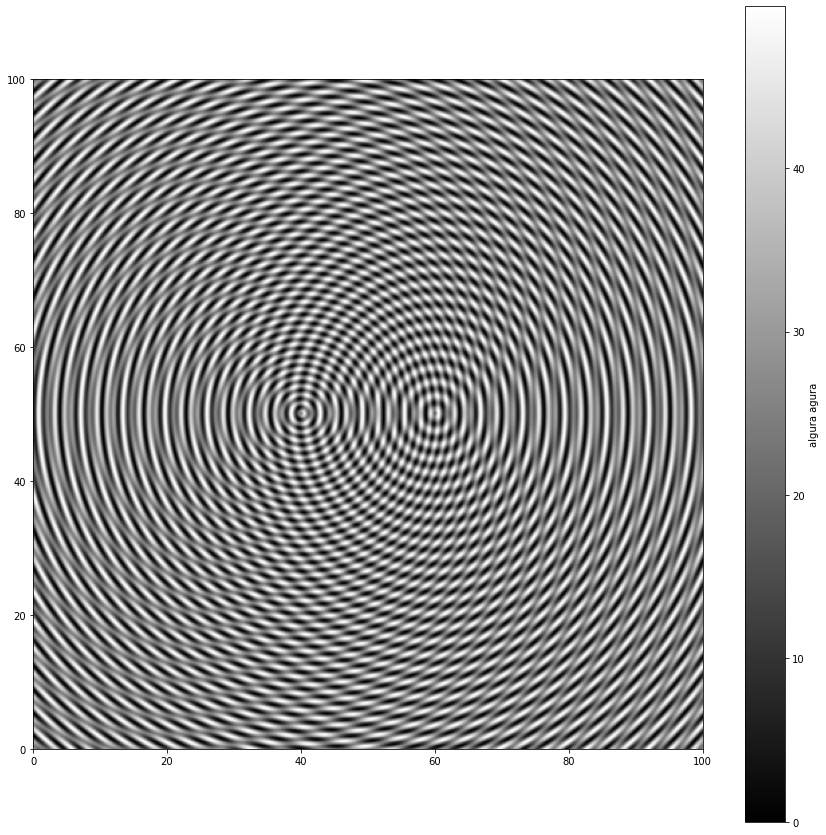

In [44]:
from math import sqrt, sin, pi 
from numpy import empty 
from pylab import imshow, gray, show, colorbar

side = 100
points = 500
spacing = side/points
xi = empty([points, points], float)

k1, k2 = 5, 3
a1, a2 = 1, 1

def onda(x, y, x0, y0, a, k):
    r = sqrt((x-x0)**2 + (y-y0)**2)
    return a*sin(k*r)

for i in range(points):
    y = spacing*i
    for j in range(points):
        x = spacing*j
        xi[i, j] = onda(x,y, 40, 50, a1, k1)+onda(x,y, 60, 50, a2, k2)

fig, ax = plt.subplots(figsize=(15, 15))


ax.imshow(xi, origin="lower", extent=[0, side, 0, side])
cb = colorbar(plot)
cb.set_label("algura agura")
gray()
show()

# Ex 2
## Foi para entrega

# Ex 3

In [45]:
# Load data
dados = pd.read_csv("millikan.txt", delimiter=' ')
dados = np.array(dados)

In [46]:
# Calcular o ajuste de dados
x, y = dados[:,0], dados[:, 1]
 
delta = len(x) * sum(x**2) - sum(x)**2
a = (len(x) * sum(x*y) - sum(x) * sum(y)) / delta
b = (sum(x**2) * sum(y) - sum(x) * sum(x*y)) / delta


a, b

(4.088227358517512e-15, -1.7312358039813585)

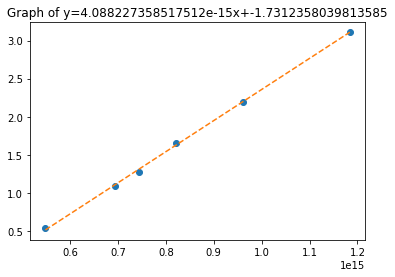

In [47]:
plt.title(f'Graph of y={a}x+{b}')
plt.plot(dados[:,0], dados[:, 1],  'o')
plt.plot(dados[:,0], [a*i+b for i in dados[:,0]], '--')

# Ex 4

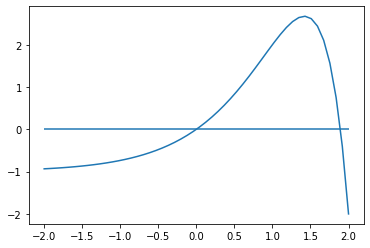

In [63]:
def eq(x):
    return 4**x - 3**(2*x) + 2**(3*x) -1

x = np.linspace(-2, 2)
plt.hlines(y=0, xmin=-2, xmax=2)
plt.plot(x, eq(x))  

## Bissecção

In [49]:
def bissess(eq, p1=-2, p2=2, max_depth=100, thr=1e-12, iterations=0):
    # p1 e p2 são palpites
    assert p2 > p1, "error"

    if iterations >= max_depth or abs(p1-p2)<=thr:
        print(f"Zero found at {p1} - Iteration {iterations}")
        return

    if eq(p1) * eq(p2) <= 0:
        # Significa que temos um 0 aqui no meio!
        delta = abs((p1-p2) / 2)
        if eq(p1) * eq(p2-delta) <= 0:
            return bissess(eq, p1, p2-delta, max_depth=max_depth, iterations=iterations+1)
            
        elif eq(p1+delta) * eq(p2) <= 0:
            return bissess(eq, p1+delta, p2, max_depth=max_depth, iterations=iterations+1)
    else:
        print("Nothing found at these intervals")
        return 

In [50]:
bissess(eq, p1=-2, p2=1)

Zero found at -4.547473508864641e-13 - Iteration 42


In [51]:
bissess(eq, p1=1.5, p2=2)

Zero found at 1.8928404581092764 - Iteration 39


## Secante

In [60]:
def secante(eq, p1=-2, p2=2, max_depth=100, thr=1e-12, iterations=0):
    # p1 e p2 são palpites
    assert p2 > p1, "error"

    if iterations >= max_depth or abs(p1-p2)<=thr:
        print(f"Zero found at {p1} - Iteration {iterations}")
        return

    if eq(p1) * eq(p2) <= 0:
        # Significa que temos um 0 aqui no meio!
        # reta = ax+b
        # slope = (y1-y2)/(x1-x2)
        # b = y-intercept = (x1*y2 - x2*y1)/(x1-x2)
        a = (eq(p1) - eq(p2)) / (p1 - p2)
        b = (p1*eq(p2) - p2*eq(p1)) / (p1 - p2)
        # O novo ponto
        c = -b/a
        if eq(p1) * eq(c) <= 0:
            return secante(eq, p1, c, iterations=iterations+1)
            
        elif eq(c) * eq(p2) <= 0:
            return secante(eq, c, p2, iterations=iterations+1)
    else:
        print("Nothing found at these intervals")
        return 

In [61]:
secante(eq, p1=-1.4, p2=0.5)

Zero found at -1.7007535037762273e-16 - Iteration 27


In [62]:
secante(eq, p1=1.5, p2=2)

Zero found at 1.8928404581098237 - Iteration 23


# Ex 5

## Newton

In [55]:
def newton(eq, p0, previous=None, max_depth=50, thr = 1e-10, iterations=0):
    previous = p0 + 1

    while True:
        # Compute tangent line at point p1
        delta = 1e-5
        a = (eq(p0+delta) - eq(p0)) / delta
        b = eq(p0) - a * p0

        p0 = -b/a # Zero da tangente aka novo ponto 
        iterations += 1

        if iterations >= max_depth or abs(previous-p0)<=thr:
            break
        previous = p0

    print(f"Zero found at {p0} - Iteration {iterations}")
    return p0


In [56]:
newton(eq, p0=-0.3)

Zero found at 1.0867826032956801e-17 - Iteration 5


1.0867826032956801e-17

In [57]:
newton(eq, p0=1.5)

Zero found at 1.8928404581098242 - Iteration 12


1.8928404581098242

# Ex 6

In [58]:
import numpy as np


def invertermat(matrix):
    n = matrix.shape[0]
    inverted = np.identity(n)


    # N será o tamanho da matriz
    n = matrix.shape[0]

    ## Colocar o triangulo inferior a 0's
    # Para cada linha da matriz..
    for line in range(n):
        # Dividir a linha pelo seu pivot 
        # de modo a ter a diagonal = 1
        pivot = matrix[line][line]
        matrix[line] = matrix[line]/pivot
        inverted[line] =  inverted[line]/pivot

        # Para cada uma das linhas por baixo
        # do pivot, vamos subtrair à linha
        # a linha do nosso pivot * uma constante, 
        # de modo a que, na coluna do pivot, por baixo deste
        # apenas haja zeros
        for other_line in range(n-line-1):
            # Queremos que no lugar do 'pivot_atual' seja 0
            pivot_atual = matrix[other_line+line+1][line]
            matrix[other_line+line+1] = matrix[other_line+line+1] - (pivot_atual/1) * matrix[line]
            inverted[other_line+line+1] = inverted[other_line+line+1] - (pivot_atual/1) * inverted[line]


    ## Colocar o triangulo superior a 0's
    # Agora vamos começar de baixo para cima ou seja,
    # para cada linha a cima de cada pivot (o 1 na diagonal)
    # vamos subtrair a linha atual * uma constante de modo a que
    # em cima de cada 1 na diagonal, haja só 0's
    for line in range(1, n, 1):
        for other_line in range(1, n-line+1, 1):
            # Queremos que no lugar do 'pivot_atual' seja 0
            pivot_atual =  matrix[-other_line-line][-line]
            matrix[-other_line-line] = matrix[-other_line-line] - (pivot_atual) * matrix[-line]
            inverted[-other_line-line] = inverted[-other_line-line] - (pivot_atual) * inverted[-line]
        

    
    return inverted


invertermat(np.array([
    [7, 3, -1, 2], 
    [3, 8, 1, 4], 
    [-1, 1, 4, -1], 
    [2, -4, -1, 6]]
, dtype=np.float64))

array([[ 0.18515685, -0.07727621,  0.06579954,  0.00076511],
       [-0.03442999,  0.10941086, -0.05355777, -0.07039021],
       [ 0.0351951 , -0.02295333,  0.27697016,  0.04973221],
       [-0.07880643,  0.09487376, -0.01147666,  0.12777353]])

## Ex 7

In [64]:
# GABI
def LUdecomp(x):
    l=len(x[1])
    a=x.copy()
    b=x.copy()


    # Triangular superior
    for k in range(0,l): 
        for i in range(k+1,l,1):
            # guarda-se o primeiro elemento não nulo de cada linha
            c=a[i][k] 
            for j in range(k,l,1):
                # subtrai-se a linha i as linhas abaixo de i 
                # de forma a anular o primeiro elemento não nulo de cada linha
                a[i][j]=a[i][j]-c*((a[k][j])/a[k][k])
    for k in range(0,l):
        c=a[k][k]
        a[k]=a[k]/c

    # Triangular inferior
    for k in range(l-1,-1,-1): 
        for i in range(k-1,-1,-1):
            # guarda-se o primeiro elemento não nulo de cada linha
            c=b[i][k] 
            for j in range(k,-1,-1):
                # subtrai-se a linha i as linhas abaixo de i 
                # de forma a anular o primeiro elemento não nulo de cada linha
                b[i][j]=b[i][j]-c*((b[k][j])/b[k][k])           
            
    return a,b


matrix = np.array([
    [7, 3, -1, 2], 
    [3, 8, 1, 4], 
    [-1, 1, 4, -1], 
    [2, -4, -1, 6]]
, dtype=np.float64)

LUdecomp(matrix)

(array([[ 1.        ,  0.42857143, -0.14285714,  0.28571429],
        [ 0.        ,  1.        ,  0.21276596,  0.46808511],
        [ 0.        ,  0.        ,  1.        , -0.38922156],
        [ 0.        ,  0.        ,  0.        ,  1.        ]]),
 array([[ 5.40082645,  0.        ,  0.        ,  0.        ],
        [ 1.95652174, 10.52173913,  0.        ,  0.        ],
        [-0.66666667,  0.33333333,  3.83333333,  0.        ],
        [ 2.        , -4.        , -1.        ,  6.        ]]))

# Ex 8
## Foi para entrega